   Channel  Counts
0        0       1
1        1       0
2        2       1
3        3       0
4        4       0


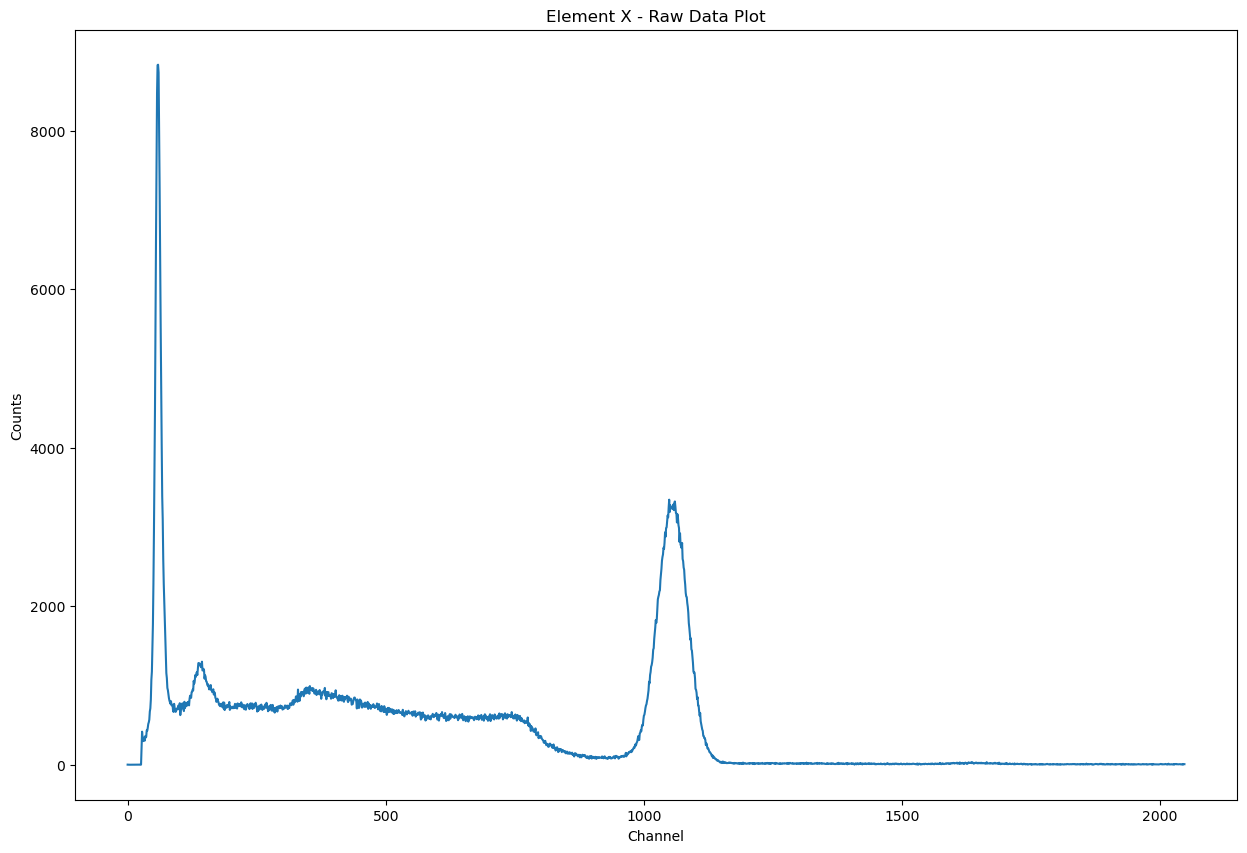

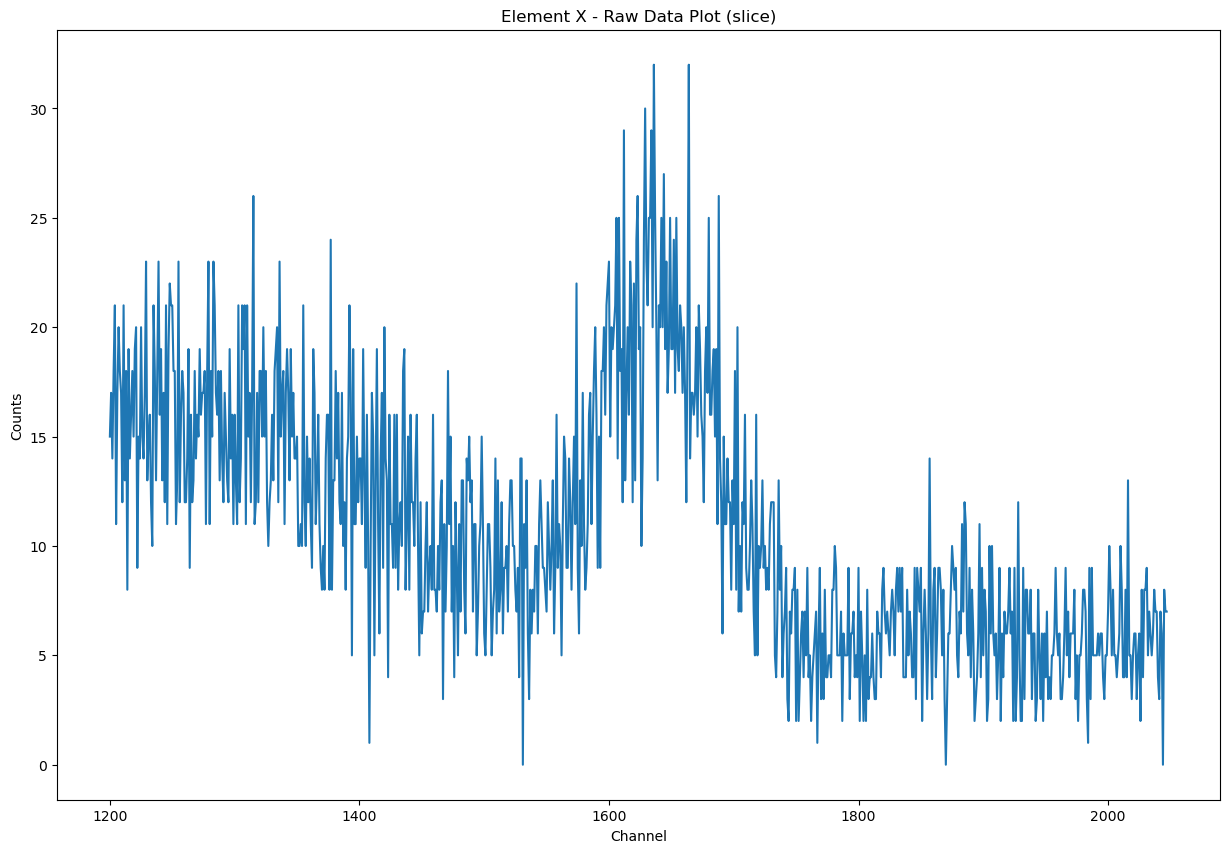

In [3]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_E_x = pd.read_csv("Element_X.csv") # create pandas dataframe
print(df_E_x.head()) # print first 5 rows


##############
# Plot data
##############

x_E_x = df_E_x["Channel"] # grab column
y_E_x = df_E_x["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Element X - Raw Data Plot")
plt.plot(x_E_x, y_E_x)
plt.show()

x_E_x_slice = df_E_x["Channel"][1200:] # grab column
y_E_x_slice = df_E_x["Counts"][1200:] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Element X - Raw Data Plot (slice)")
plt.plot(x_E_x_slice, y_E_x_slice)
plt.show()

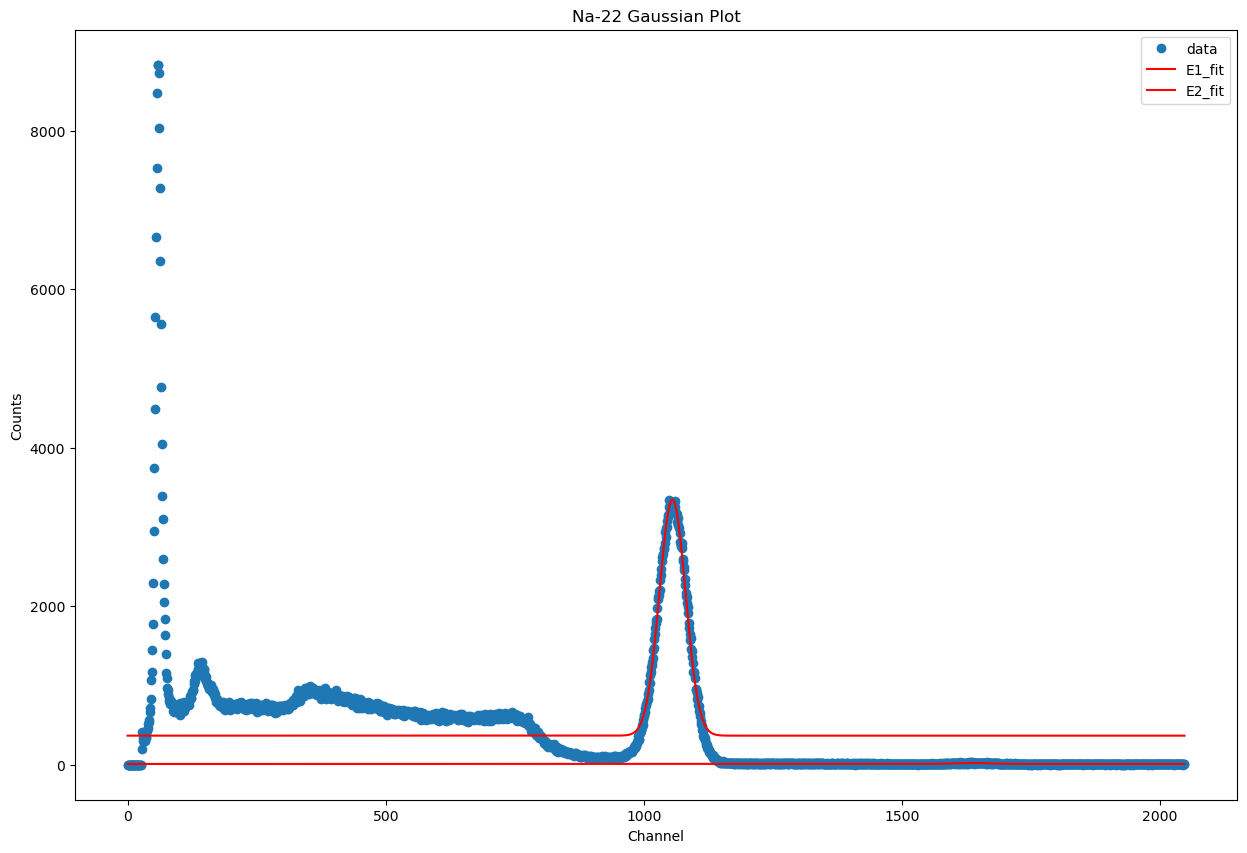

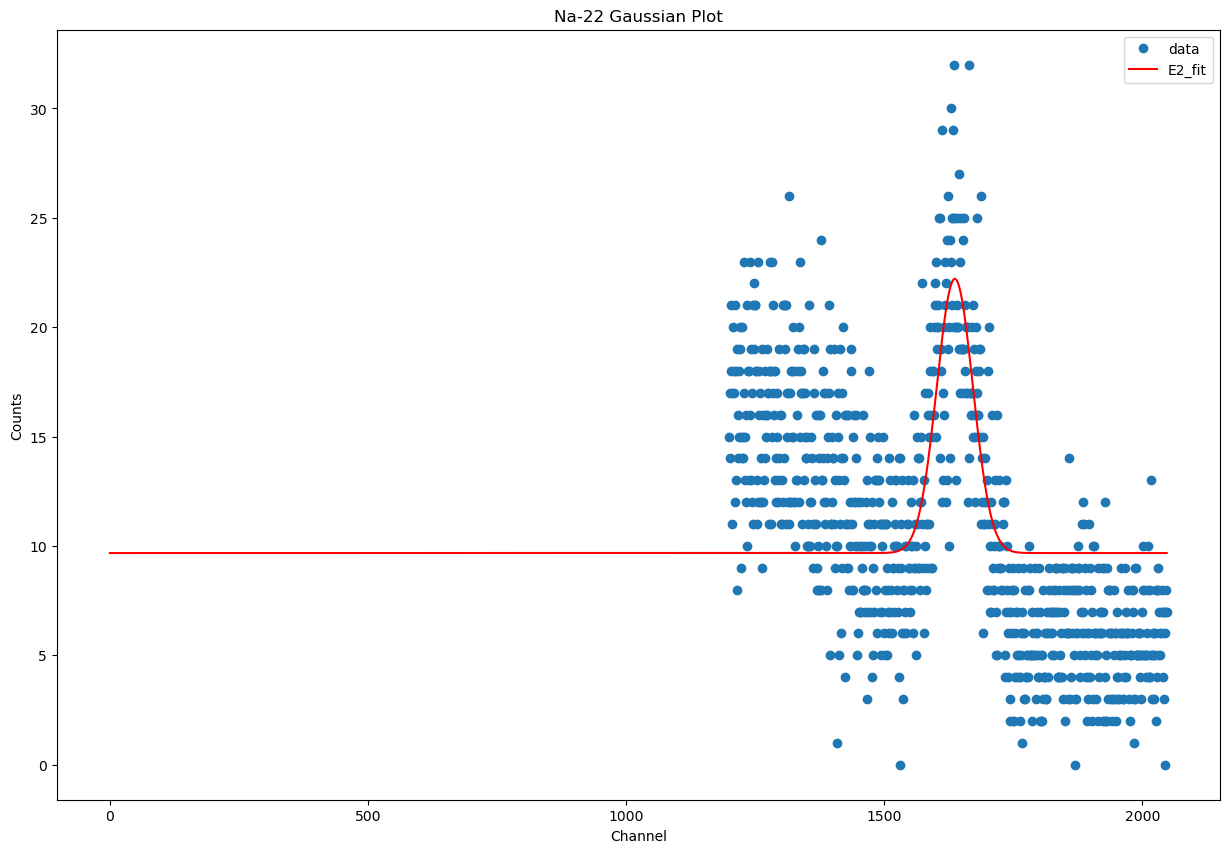

In [7]:
################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x, a, mean, sigma, h):
    fit = a*np.exp((-(x-mean)**2)/(2*sigma**2)) + h
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_E_x_e1, pcov_E_x_e1 = curve_fit(gaus, x_E_x, y_E_x, p0=[a:=3000, mean:=1050, sigma:=250, h:=100]) # solves for a, mean, sigma, h
y_E_x_fit_e1 = gaus(x_E_x, *popt_E_x_e1) # creates y(x) = gaus function with fitted values

popt_E_x_e2, pcov_E_x_e2 = curve_fit(gaus, x_E_x_slice, y_E_x_slice, p0=[a:=30, mean:=1650, sigma:=25, h:=5]) # solves for a, mean, sigma, h
y_E_x_fit_e2 = gaus(x_E_x, *popt_E_x_e2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_E_x, y_E_x, 'o', label="data")
plt.plot(x_E_x, y_E_x_fit_e1, 'r-', label='E1_fit')
plt.plot(x_E_x, y_E_x_fit_e2, 'r-', label='E2_fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Na-22 Gaussian Plot")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(x_E_x_slice, y_E_x_slice, 'o', label="data")
plt.plot(x_E_x, y_E_x_fit_e2, 'r-', label='E2_fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Na-22 Gaussian Plot")
plt.legend()
plt.show()

In [9]:
#####################
# Print fit data
# Print uncertainty
#####################

print("Fit Amplitude, E-x-E1: ", popt_E_x_e1[0],
      "\n Fit Mean, E-x-E1: ", popt_E_x_e1[1],
      "\n Fit Sigma, E-x-E1: ", popt_E_x_e1[2],
      "\n Fit Height, E-x-E1: ", popt_E_x_e1[3])

print("\n Uncertainty matrix, E-x-E1: \n", pcov_E_x_e1)

print("\n Fit Amplitude, E-x-E2: ", popt_E_x_e2[0],
      "\n Fit Mean, E-x-E2: ", popt_E_x_e2[1],
      "\n Fit Sigma, E-x-E2: ", popt_E_x_e2[2],
      "\n Fit Height, E-x-E2: ", popt_E_x_e2[3])

print("\n Uncertainty matrix, E-x-E2: \n", pcov_E_x_e2)

Fit Amplitude, E-x-E1:  2979.6138613384787 
 Fit Mean, E-x-E1:  1055.315423795154 
 Fit Sigma, E-x-E1:  25.252046129259703 
 Fit Height, E-x-E1:  366.853960921474

 Uncertainty matrix, E-x-E1: 
 [[ 1.51550285e+04  5.29894345e-05 -8.29992134e+01 -1.65828647e+02]
 [ 5.29894345e-05  1.44094013e+00 -4.48933253e-07  1.13406686e-08]
 [-8.29992134e+01 -4.48933253e-07  1.47464779e+00 -2.81158667e+00]
 [-1.65828647e+02  1.13406686e-08 -2.81158667e+00  2.34517136e+02]]

 Fit Amplitude, E-x-E2:  12.536397669060653 
 Fit Mean, E-x-E2:  1636.6224667069846 
 Fit Sigma, E-x-E2:  35.02790335714184 
 Fit Height, E-x-E2:  9.676037764849488

 Uncertainty matrix, E-x-E2: 
 [[ 6.15035443e-01  7.71976275e-07 -1.00636976e+00 -2.63685437e-02]
 [ 7.71976275e-07  6.20368099e+00 -2.14912457e-06 -1.09028142e-10]
 [-1.00636976e+00 -2.14912457e-06  6.78553143e+00 -1.47301203e-01]
 [-2.63685437e-02 -1.09028142e-10 -1.47301203e-01  3.72907519e-02]]
